# Project: Investigate a Dataset (TMDb movie data)

### Analysis by Yasser El Sawaf

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
 This analysis will use revenue as dependant variable so the report will address questions like ,What kinds of properties are associated with movies that have high revenues?

In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df[(df.revenue == 0 ) ^ (df.budget == 0)].shape

(2310, 21)

In [5]:
df.iloc[8142]

id                                                                   2293
imdb_id                                                         tt0113749
popularity                                                       0.552091
budget                                                            6000000
revenue                                                                 2
original_title                                                   Mallrats
cast                    Jason Lee|Jeremy London|Shannen Doherty|Claire...
homepage                                                              NaN
director                                                      Kevin Smith
tagline                 They're not there to shop. They're not there t...
keywords                             sex|game show|slacker|comic|shopping
overview                Both dumped by their girlfriends, two best fri...
runtime                                                                94
genres                                

#### Notes:
    - dropping irrelvant columns to the analysis
    - change release_date column to datetime
    - many entries have no budget or revenue

### Data Cleaning 

#### 1- removing unnecessary columns

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
df = df [['id','original_title','release_date', 'budget', 'revenue','vote_count', 'vote_average', 'popularity', 'genres']]
df.head(1)

,id,original_title,release_date,budget,revenue,vote_count,vote_average,popularity,genres
0,135397,Jurassic World,6/9/15,150000000,1513528810,5562,6.5,32.985763,Action|Adventure|Science Fiction|Thriller


#### 2- change release_date column to datetime

In [8]:
df.release_date = pd.to_datetime(df.release_date , format= '%m/%d/%y')
df.release_date[1]

Timestamp('2015-05-13 00:00:00')

#### 3- fill the entries with 0 budget with revenue value and entries with 0 revenue with thier budget value 

In [9]:
df['budget'].mask(df['budget'] == 0 , df.revenue , inplace=True)
df['revenue'].mask(df['revenue'] == 0 , df.budget , inplace=True)

In [10]:
#dropping entries that have 0 in both budget and revneue 
df.drop( df[df.budget == 0 & df.revenue].index , inplace= True) 
df[df.budget == 0 & df.revenue]

,id,original_title,release_date,budget,revenue,vote_count,vote_average,popularity,genres


In [11]:
df.shape

(6165, 9)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( what is top  genres in the top 100 movies that have the highest revenue ?)

In [12]:
df[df.genres.isna()]

,id,original_title,release_date,budget,revenue,vote_count,vote_average,popularity,genres
10659,4255,The Party at Kitty and Stud's,1970-02-10,5000,5000,10,3.0,0.344172,NaN


In [13]:
#removing the entry with nan value in genres coulmns
df.drop(df[df.genres.isna()].index , inplace=True)

In [14]:
#parse genres values which is pipe seperated and change it to list for easrier access in analysis  
df.genres = df.genres.apply(lambda x : x.split("|"))
df.genres 

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10835          [Action, Adventure, Drama, War, Romance]
10841                                         [Western]
10848                      [Adventure, Science Fiction]
10855                [Comedy, Family, Mystery, Romance]
10865                                          [Horror]
Name: genres, Length: 6164, dtype: object

In [15]:
#top 100 movies in revenue 
highest_revenue = df.sort_values('revenue' , ascending= False ).head(100)
highest_revenue

,id,original_title,release_date,budget,revenue,vote_count,vote_average,popularity,genres
1386,19995,Avatar,2009-12-10,237000000,2781505847,8458,7.1,9.432768,"[Action, Adventure, Fantasy, Science Fiction]"
3,140607,Star Wars: The Force Awakens,2015-12-15,200000000,2068178225,5292,7.5,11.173104,"[Action, Adventure, Science Fiction, Fantasy]"
5231,597,Titanic,1997-11-18,200000000,1845034188,4654,7.3,4.355219,"[Drama, Romance, Thriller]"
4361,24428,The Avengers,2012-04-25,220000000,1519557910,8903,7.3,7.637767,"[Science Fiction, Action, Adventure]"
0,135397,Jurassic World,2015-06-09,150000000,1513528810,5562,6.5,32.985763,"[Action, Adventure, Science Fiction, Thriller]"
...,...,...,...,...,...,...,...,...,...
4381,41154,Men in Black 3,2012-05-23,225000000,624026776,3142,6.1,2.592896,"[Action, Comedy, Science Fiction]"
1920,10138,Iron Man 2,2010-04-28,200000000,623933331,4920,6.6,5.704860,"[Adventure, Action, Science Fiction]"
7389,2062,Ratatouille,2007-06-22,150000000,623722818,2434,7.3,2.764535,"[Animation, Comedy, Family, Fantasy]"
629,157336,Interstellar,2014-11-05,165000000,621752480,6498,8.0,24.949134,"[Adventure, Drama, Science Fiction]"


In [16]:
#creating a function that takes the genres list and count the number of genre frequency 
genres_dict = {} # dict that will store the genres as keys and the number of occurences as values

def genre_counter (genre_list ):
    for genre in genre_list:
        genres_dict[genre] = genres_dict.get(genre , 0) +1

In [17]:
highest_revenue.genres.apply(lambda x : genre_counter(x))
genres_dict

{'Action': 53,
 'Adventure': 73,
 'Fantasy': 41,
 'Science Fiction': 33,
 'Drama': 14,
 'Romance': 7,
 'Thriller': 18,
 'Crime': 7,
 'Family': 33,
 'Animation': 21,
 'Comedy': 15,
 'Mystery': 5,
 'War': 1}

C:\Users\Yaser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


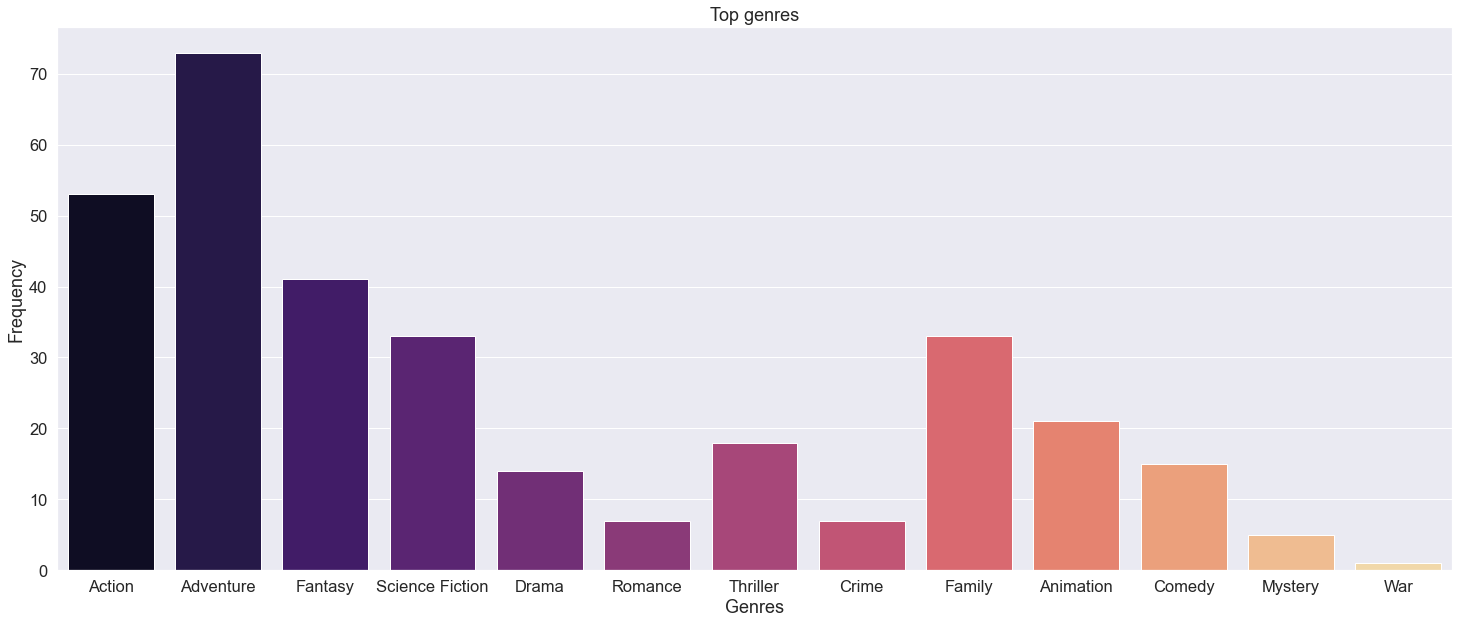

In [18]:
keys = list(genres_dict.keys())
vals = [genres_dict[k] for k in keys]

sns.set(font_scale = 1.5)
fig, axis = plt.subplots(figsize=(25, 10))
graph = sns.barplot(keys, vals, palette='magma', ax=axis)
graph.set(xlabel='Genres', ylabel='Frequency', title='Top genres')
plt.show()

In [21]:
# The graph above shows the freqency of genres in the top 100 movies(in revenue)

### Research Question 2  (what is the correlation between all variables?)

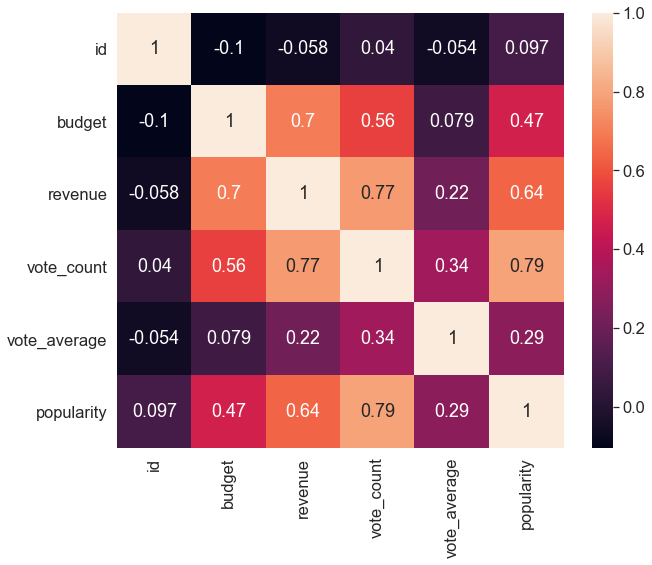

In [19]:
# plotting heatmap of the dataset 
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr() , annot=True)
plt.show()

### Research Question 3  (what is the correlation between revenue and vote_count?)

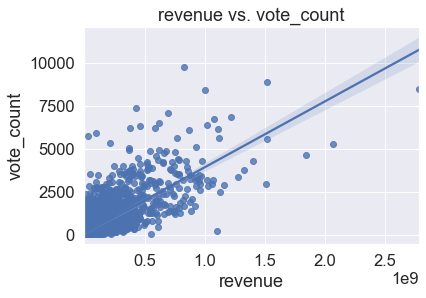

In [20]:
sns.regplot(y="vote_count",  x="revenue",  data=df);

plt.title('revenue vs. vote_count');
plt.ylabel('vote_count');
plt.xlabel('revenue');

> as the plot shows the highest revneue movies have Positive Correlation with vote count

### Research Question 3  (what is the correlation between budget and revenue?)

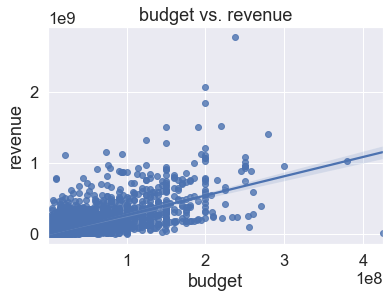

In [23]:
sns.regplot(y="revenue",  x="budget",  data=df);

plt.title('budget vs. revenue');
plt.ylabel('revenue');
plt.xlabel('budget');

> the graph shows linear relation between budget and revenue ( more budget means more revenue) up to a certain range  (200~2500 mill)which all the revenue successfull movies lies within range , and more budget doesnt meant more revenue after that range. 

### Research Question 3  (which movie has the most profit  (revenue - budget) ?)

In [37]:
pd.Series(df.revenue - df.budget).max()

2544505847

In [34]:
pd.Series(df.revenue - df.budget).argmax()

597

In [35]:
df.iloc[597]

id                                                        19995
original_title                                           Avatar
release_date                                2009-12-10 00:00:00
budget                                                237000000
revenue                                              2781505847
vote_count                                                 8458
vote_average                                                7.1
popularity                                              9.43277
genres            [Action, Adventure, Fantasy, Science Fiction]
Name: 1386, dtype: object

> Avrar movie  made  2.54 bill of pure profits (wow)

<a id='conclusions'></a>
## Conclusions

- Adventure and Action is the most popular genres 
- The analysis supports the intuition that revenue has high correlation with budget and vote count and populartiy  
- high revenue movies have budget in the range of (200 ~ 250) mill 
- Avatar movie made the most profit as the budget cost was 237 mill only and the revenue was 2.7 bill

> **limitations**: large number of movies has either no budget or revenue value 



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [125]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1